# Определение рыночной стоимости объектов недвижимости

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Задача нашей работы — установить параметры, которые позволят построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных:

•	airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

•	balcony — число балконов

•	ceiling_height — высота потолков (м)

•	cityCenters_nearest — расстояние до центра города (м)

•	days_exposition — сколько дней было размещено объявление (от публикации до снятия)

•	first_day_exposition — дата публикации

•	floor — этаж

•	floors_total — всего этажей в доме

•	is_apartment — апартаменты (булев тип)

•	kitchen_area — площадь кухни в квадратных метрах (м²)

•	last_price — цена на момент снятия с публикации

•	living_area — жилая площадь в квадратных метрах(м²)

•	locality_name — название населённого пункта

•	open_plan — свободная планировка (булев тип)

•	parks_around3000 — число парков в радиусе 3 км

•	parks_nearest — расстояние до ближайшего парка (м)

•	ponds_around3000 — число водоёмов в радиусе 3 км

•	ponds_nearest — расстояние до ближайшего водоёма (м)

•	rooms — число комнат

•	studio — квартира-студия (булев тип)

•	total_area — площадь квартиры в квадратных метрах (м²)

•	total_images — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.


### Шаг 1. Откроем файл с данными и изучим общую информацию. 

In [1328]:
import pandas as pd #импорт необходимых библиотек
import matplotlib.pyplot as plt #импортируем библиотеку для построения графика
import numpy as np

In [1329]:
data=pd.read_csv("/datasets/real_estate_data.csv", sep='\t') #прочитаем и разделим на столбцы информацию, слившуюся в одну строчку 
data.info() # изучаю общую информацию по дата фрейму
data.head(50)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

После считывания файла, воспользовалась разделением строки. Изучив данные можно сказать, что многие данные имеют неверный тип. 

### Шаг 2. Предобработка данных

In [1330]:
print("Количество пропусков:") #считаю все пропуски
print(data.isnull().sum())

Количество пропусков:
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Посчитала пропуски. 
Высоту потолка можно заполнить стандартной высотой потолка 2,50 м. Данные ячейки не были заполнены продавцами, возможно они не знали высоту точно, поэтому не заполнили.
Количество этажей можно заменить медианой.
Жилую площадь заменить медианой.
Пропуски в ячейках "Является ли апартаментами" заменить на True, так как False есть, видимо не произошло переноса положительного значения.
Площадь кухни отсутствует возможно в связи с отстутсявием отдельной кухни, возможно это кухня-ниша или она считается жилой или гостиной комнатой, как в евро-двушках. Так что это значение надо заменить на 0.
По балконам то же самое. надо заменить на 0, возможно балкон просто отсутствует.
Количество пустых ячеек с названием населенного пункта не так велико, поэтому от них можно избавиться или заменить на "другие". 
Расстояние до центра я бы заменила медианой, сгруппированных квартир по названию населенного пункта. Расстояние до аэропорта заменила бы на медиану по всем,так как эти данные не будут использоваться в задании.
Парки и пруды бы заменила на 0, так как возможно их просто нет. 
Количество дней от публикации до снятия либо заменила бы медианой, либо 0, так как не понятно сняли ли объявление в тот же день или произошла ошибка выгрузки и эти данные не записались.

In [1331]:
floors_total_median=data['floors_total'].median() # нашла медиану
living_area_median=data['living_area'].median()
days_exposition_median=data['days_exposition'].median()

data['floors_total'].fillna(floors_total_median, inplace=True) # подставила медианное значение в пропуски
data['living_area'].fillna(living_area_median, inplace=True)
data['days_exposition'].fillna(days_exposition_median, inplace=True)

standart_ceiling_height=2.50
data['ceiling_height'].fillna(standart_ceiling_height, inplace=True) #поставила стандартное значение высоты потолка 

data['is_apartment'].fillna("True", inplace=True) #в булевом массиве проставила True

data["kitchen_area"].fillna(0, inplace=True) #заменила значения на 0
data["balcony"].fillna(0, inplace=True)
data["parks_around3000"].fillna(0, inplace=True)
data["parks_nearest"].fillna(0, inplace=True) 
data["ponds_around3000"].fillna(0, inplace=True) 
data["ponds_nearest"].fillna(0, inplace=True) 
data["locality_name"].fillna("Другие", inplace=True) #пропуски в пропущенных населенных пунктах заменила на "другие"

#Заменяем медианой пропущенные строки в столбцах по удаленности от центра,сгруппированные по населенному пункту
pivot_location=data.pivot_table(index="locality_name", values="cityCenters_nearest", aggfunc="median")
#заметила, что дублируются поселки из-за буквы Ё
data['locality_name'].replace('посёлок Лисий Нос','посeлок Лисий Нос',inplace=True)
data["cityCenters_nearest"].fillna(data["cityCenters_nearest"].mean(), inplace=True)
print(pivot_location)

for locality_name in data['locality_name'].unique(): #заменяем медианой по населенному пункту
   filter_flags = data['cityCenters_nearest'].isna() & (data['locality_name'] == locality_name)
   data.loc[filter_flags, 'cityCenters_nearest'] = data.loc[data['locality_name'] == locality_name, 'cityCenters_nearest'].median()

  #data["cityCenters_nearest"].fillna(data["cityCenters_nearest"].mean(), inplace=True)
data["airports_nearest"].fillna(data["airports_nearest"].mean(), inplace=True)
print("Количество пропусков после проверки:")
print(data.isnull().sum()) #проверяем, остались ли пропуски
#пропусков нет

                         cityCenters_nearest
locality_name                               
Другие                                8943.0
Зеленогорск                          53381.0
Колпино                              32018.0
Красное Село                         29140.5
Кронштадт                            49575.0
Ломоносов                            51677.0
Павловск                             32683.0
Петергоф                             33771.0
Пушкин                               27930.5
Санкт-Петербург                      12244.5
Сестрорецк                           34821.0
поселок Лисий Нос                    28246.0
поселок Мурино                       21888.0
посёлок Александровская              27468.0
посёлок Белоостров                   38868.0
посёлок Левашово                     25727.0
посёлок Лисий Нос                    27297.0
посёлок Металлострой                 27602.0
посёлок Молодёжное                   65764.0
посёлок Парголово                    19311.0
посёлок Пе

In [1332]:
data["first_day_exposition"] = pd.to_datetime(data["first_day_exposition"])
parameters_to_change=['floors_total','days_exposition','ponds_around3000','balcony','parks_around3000','last_price','total_area','living_area','cityCenters_nearest','airports_nearest','parks_nearest','kitchen_area']
for i in  parameters_to_change:
    data[i]=data[i].astype(int)
    
data['is_apartment']=data['is_apartment'].astype(bool)

data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null int64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null int64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null int64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null int64
cityCenters_nearest     23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000        236

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,True,...,25,0,Санкт-Петербург,18863,16028,1,482,2,755.0,95
1,7,3350000,40,2018-12-04,1,2.50,11,18,1,True,...,11,2,посёлок Шушары,12817,18603,0,0,0,0.0,81
2,10,5196000,56,2015-08-20,2,2.50,5,34,4,True,...,8,0,Санкт-Петербург,21741,13933,1,90,2,574.0,558
3,0,64900000,159,2015-07-24,3,2.50,14,30,9,True,...,0,0,Санкт-Петербург,28098,6800,2,84,3,234.0,424
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,True,...,41,0,Санкт-Петербург,31856,8098,2,112,1,48.0,121
5,10,2890000,30,2018-09-10,1,2.50,12,14,5,True,...,9,0,городской посёлок Янино-1,28793,14191,0,0,0,0.0,55
6,6,3700000,37,2017-11-02,1,2.50,26,10,6,True,...,14,1,посёлок Парголово,52996,19143,0,0,0,0.0,155
7,5,7915000,71,2019-04-18,2,2.50,24,30,22,True,...,18,2,Санкт-Петербург,23982,11634,0,0,0,0.0,95
8,20,2900000,33,2018-05-23,1,2.50,27,15,26,True,...,8,0,посёлок Мурино,28793,14191,0,0,0,0.0,189
9,18,5400000,61,2017-02-26,3,2.50,9,43,7,True,...,6,2,Санкт-Петербург,50898,15008,0,0,0,0.0,289


Изменила следующие типы данных:
В столбце Дата публикации поставила тип даты, 
В столбце общее количество этажей поставила целое число, так как дробным количество комнат не может быть, то же самое с количеством парков, прудов и количеством дней размещения объявления.
В столбце является ли апартаментами установила тип булев массив, так как уже присутствовали False в данном столбце.
Все дробные числа перевела в целые, кроме высоты потолка.


### Шаг 3. Посчитаем и добавим в таблицу

In [1333]:
data['price_per_metr']=data['last_price']/data['total_area'] #цена квадратного метра посчитана

In [1334]:
data['day_of_week']=data['first_day_exposition'].dt.weekday
data['month']=data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year 
#добавила в таблицу: день недели, месяц и год публикации объявления 

In [1335]:
data['living_to_total_ratio']=data['living_area']/data['total_area'] #добавила соотношение жилой и общей площади, а также отношение площади кухни к общей
data['kitchen_to_total_ratio']=data['kitchen_area']/data['total_area']
# так же я добавлю отдельный столбец с измерениями цены в млн для лучшей визуализации
data['last_price_mln']=data['last_price']/1000000

In [1336]:
#добавила функцию, которая будет перебирать количество этажей в стоблце floor и возвращать значения "первый, последний, другой"
def floor_group(row):
    try:
        floor = row['floor']
        floors_total = row['floors_total']
        if floor == 1:
            return 'первый'
        if floor == floors_total:
            return 'последний'
        return 'другой'
    except:
        print('проверь код, есть какая-то ошибка')
row_values = [3, 1]
row_columns = ['floor', 'floors_total']
row = pd.Series(data=row_values, index=row_columns)
floor_group(row)
data['floor_filt'] = data.apply(floor_group, axis=1)

In [1337]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_metr,day_of_week,month,year,living_to_total_ratio,kitchen_to_total_ratio,last_price_mln,floor_filt
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,True,...,755.0,95,120370.370370,3,3,2019,0.472222,0.231481,13.000,другой
1,7,3350000,40,2018-12-04,1,2.50,11,18,1,True,...,0.0,81,83750.000000,1,12,2018,0.450000,0.275000,3.350,первый
2,10,5196000,56,2015-08-20,2,2.50,5,34,4,True,...,574.0,558,92785.714286,3,8,2015,0.607143,0.142857,5.196,другой
3,0,64900000,159,2015-07-24,3,2.50,14,30,9,True,...,234.0,424,408176.100629,4,7,2015,0.188679,0.000000,64.900,другой
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,True,...,48.0,121,100000.000000,1,6,2018,0.320000,0.410000,10.000,другой
5,10,2890000,30,2018-09-10,1,2.50,12,14,5,True,...,0.0,55,96333.333333,0,9,2018,0.466667,0.300000,2.890,другой
6,6,3700000,37,2017-11-02,1,2.50,26,10,6,True,...,0.0,155,100000.000000,3,11,2017,0.270270,0.378378,3.700,другой
7,5,7915000,71,2019-04-18,2,2.50,24,30,22,True,...,0.0,95,111478.873239,3,4,2019,0.422535,0.253521,7.915,другой
8,20,2900000,33,2018-05-23,1,2.50,27,15,26,True,...,0.0,189,87878.787879,2,5,2018,0.454545,0.242424,2.900,другой
9,18,5400000,61,2017-02-26,3,2.50,9,43,7,True,...,0.0,289,88524.590164,6,2,2017,0.704918,0.098361,5.400,другой


Для дальнейшего анализа я посчитала и добавила в таблицу цену за кв метрб отношение жилой площади и площадь кухни к общей площади, перевела дату в формат 3х строк: день недели, месяц, год; добавила столбец, в котором функция возращает значение этажа "первый,другой или последний".


### Шаг 4. Проведем исследовательский анализ данных и выполним инструкции:

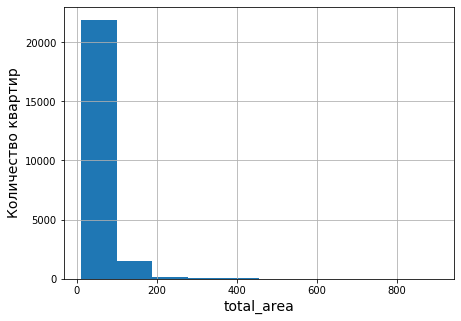

count    23699.000000
mean        60.120511
std         35.665822
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64


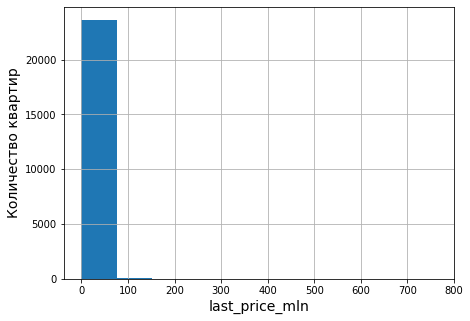

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price_mln, dtype: float64


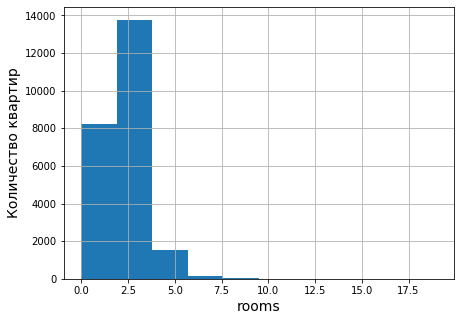

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


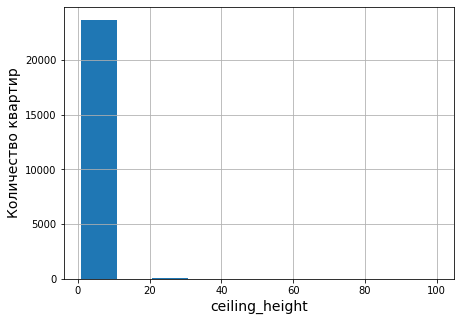

count    23699.000000
mean         2.666160
std          0.995355
min          1.000000
25%          2.500000
50%          2.500000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


In [1338]:
#изучаю следующие параметры: площадь, цена, число комнат, высота потолков
parameters=['total_area','last_price_mln','rooms','ceiling_height']
for i in parameters:
    data[i].hist(figsize=(7,5))  #строю гистограммы в цикле
    plt.xlabel(i,fontsize=14)
    plt.ylabel('Количество квартир',fontsize=14)
    plt.show()
    print(data[i].describe())  #применяю метод describe() там же

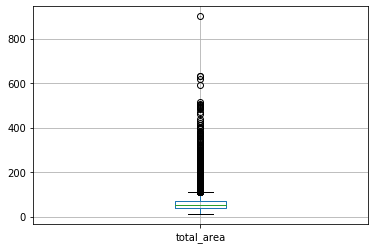

Верхний ус total_area 112
Нижний ус total_area 12


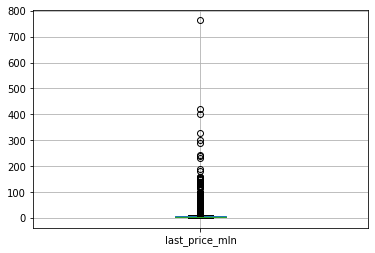

Верхний ус last_price_mln 11.8944
Нижний ус last_price_mln 0.01219


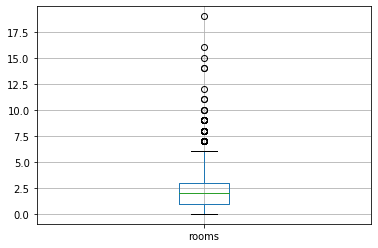

Верхний ус rooms 6
Нижний ус rooms 0


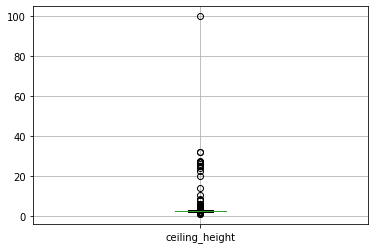

Верхний ус ceiling_height 3.0
Нижний ус ceiling_height 2.2


In [1339]:
for i in parameters: #строю диаграмму размаха, определяю в цикле значение верхнего и нижнего усов для каждого параметра
    data.boxplot(column=[i])
    plt.show()
    median = np.median(data[i])
    upper_quartile = np.percentile(data[i], 75)
    lower_quartile = np.percentile(data[i], 25)
    iqr = upper_quartile - lower_quartile
    upper_whisker = data[data[i]<=upper_quartile+1.5*iqr].max()
    upper_whisker_of_parameter=upper_whisker[i]
    print("Верхний ус", i, upper_whisker_of_parameter)
    lower_whisker = data[data[i]>=lower_quartile-1.5*iqr].min()
    lower_whisker_of_parameter=lower_whisker[i]
    print("Нижний ус", i, lower_whisker_of_parameter)

Гистограммы и диаграммы размаха построены, определены нижний и верхний "ус" для всех параметров. Нижний и верхний "ус" является ориентировочной границей нормального размаха. Остальные значения являются выбросами.
Среднее значение общей площади квартиры 60 кв.м, средняя стоимость квартиры 6,54 млн руб, среднее количество комнат 2,07, средняя высота потолка 2,66 метра.

In [1340]:
good_data=data.query('total_area<=112&last_price_mln<=11.89&rooms<=6&1<ceiling_height<=3.0')
#отфильтруем данные от выбросов
print('Мы отфильтровали {:.2%} данных'.format(1-len(good_data)/len(data)))

Мы отфильтровали 13.29% данных


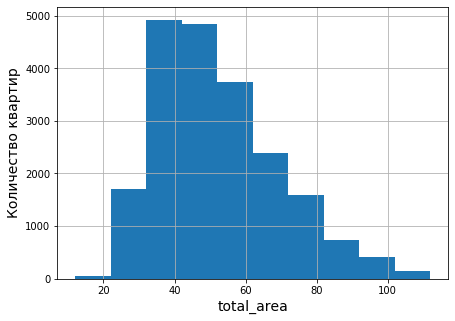

count    20550.000000
mean        51.601168
std         17.128736
min         12.000000
25%         38.000000
50%         48.000000
75%         62.000000
max        112.000000
Name: total_area, dtype: float64


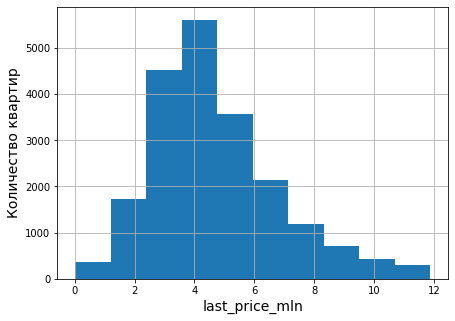

count    20550.000000
mean         4.691825
std          2.109295
min          0.012190
25%          3.286500
50%          4.300000
75%          5.800000
max         11.880000
Name: last_price_mln, dtype: float64


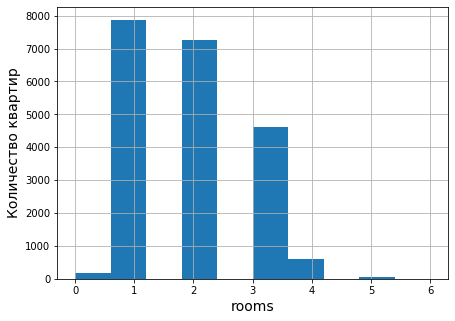

count    20550.000000
mean         1.886861
std          0.875254
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64


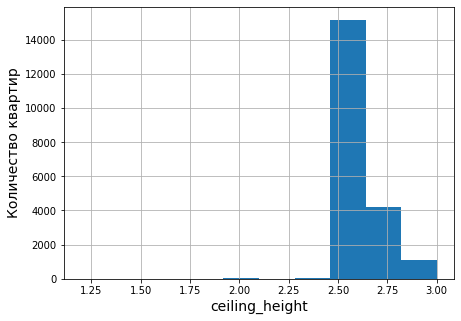

count    20550.000000
mean         2.582078
std          0.130839
min          1.200000
25%          2.500000
50%          2.500000
75%          2.650000
max          3.000000
Name: ceiling_height, dtype: float64


In [1341]:
#построим графики и диаграммы размаха для отфильтрованных данных

#изучаю следующие параметры: площадь, цена, число комнат, высота потолков
parameters=['total_area','last_price_mln','rooms','ceiling_height']
for i in parameters:
    good_data[i].hist(figsize=(7,5))  #строю гистограммы в цикле
    plt.xlabel(i,fontsize=14)
    plt.ylabel('Количество квартир',fontsize=14)
    plt.show()
    print(good_data[i].describe())  #применяю метод describe() там же

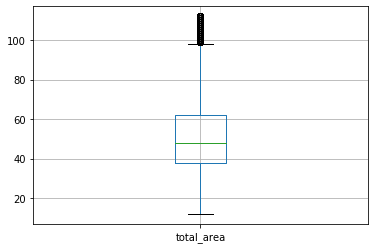

Верхний ус total_area 98
Нижний ус total_area 12


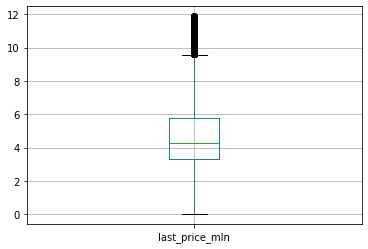

Верхний ус last_price_mln 9.57
Нижний ус last_price_mln 0.01219


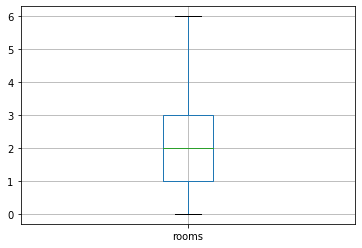

Верхний ус rooms 6
Нижний ус rooms 0


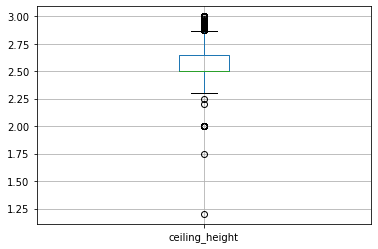

Верхний ус ceiling_height 2.87
Нижний ус ceiling_height 2.3


In [1342]:
for i in parameters: #строю диаграмму размаха, определяю в цикле значение верхнего и нижнего усов для каждого параметра
    good_data.boxplot(column=[i])
    plt.show()
    median = np.median(good_data[i])
    upper_quartile = np.percentile(good_data[i], 75)
    lower_quartile = np.percentile(good_data[i], 25)
    iqr = upper_quartile - lower_quartile
    upper_whisker = good_data[good_data[i]<=upper_quartile+1.5*iqr].max()
    upper_whisker_of_parameter=upper_whisker[i]
    print("Верхний ус", i, upper_whisker_of_parameter)
    lower_whisker = good_data[good_data[i]>=lower_quartile-1.5*iqr].min()
    lower_whisker_of_parameter=lower_whisker[i]
    print("Нижний ус", i, lower_whisker_of_parameter)

После построения графиков на основе отфильтрованных данных, можно сделать более точные выводы. средняя площадь квартир равна 51,6 кв.м, средняя цена 4,69 млн руб, среднее количество комнат в квартире 1,88, в среднем высота потолка равна 2,58 м.

In [1343]:
good_data['days_exposition'].describe() #изучаем время продажи квартиры, считаю среднее и медиану

count    20550.000000
mean       160.832701
std        196.939858
min          1.000000
25%         45.000000
50%         95.000000
75%        188.000000
max       1580.000000
Name: days_exposition, dtype: float64

Text(0, 0.5, 'Количество квартир')

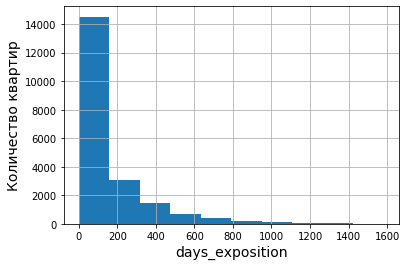

In [1344]:
good_data['days_exposition'].hist() #строю гистограмму
plt.xlabel('days_exposition',fontsize=14)
plt.ylabel('Количество квартир',fontsize=14)

Верхний ус 402
Нижний ус 1


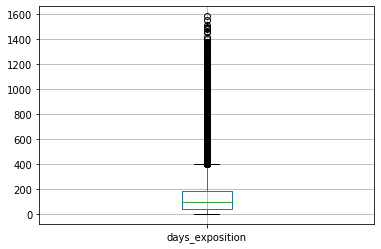

In [1345]:
good_data.boxplot(column=['days_exposition']) 

median = np.median(good_data['days_exposition'])
upper_quartile = np.percentile(good_data['days_exposition'], 75)
lower_quartile = np.percentile(good_data['days_exposition'], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = good_data[good_data['days_exposition']<=upper_quartile+1.5*iqr].max()
upper_whisker_data_days_exposition=upper_whisker['days_exposition']
print("Верхний ус", upper_whisker_data_days_exposition)
lower_whisker = good_data[good_data['days_exposition']>=lower_quartile-1.5*iqr].min()
lower_whisker_data_days_exposition=lower_whisker['days_exposition']
print("Нижний ус", lower_whisker_data_days_exposition)

В среднем продажа квартиры занимает 160 дней, медианное значение составляет 95 дней. Длительность продажи квартиры свыше 402 дней можно отнести к необычно долгой. К быстрым продажам я бы отнесла длительность продажи квартиры меньше первой квартили, то есть менее 45 дней. Показатель стандартного отклонения 196, это говорит о том, что значения в выборке неоднородны и присутствуют выбросы и аномальные значения. 
 

Мы отфильтровали 10.12% данных


count    18471.00000
mean       106.41465
std         90.17553
min          1.00000
25%         44.00000
50%         92.00000
75%        139.00000
max        401.00000
Name: days_exposition, dtype: float64

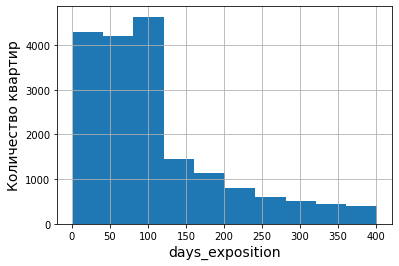

In [1346]:
days_exposition_filtered=good_data.query('days_exposition<@upper_whisker_data_days_exposition') #Уберем редкие и выбивающиеся значения
print('Мы отфильтровали {:.2%} данных'.format(1-len(days_exposition_filtered)/len(good_data)))
# посчитаем, какую долю строк собираемся отбросить

days_exposition_filtered['days_exposition'].hist() 
plt.xlabel('days_exposition',fontsize=14)
plt.ylabel('Количество квартир',fontsize=14)
#построим гистограмму для отфильтрованных данных длительности продажи 
days_exposition_filtered['days_exposition'].describe()

Я отфильтровала данные по длительности продажи менее 402 дней.так как верхний ус показывал это значение. 10 % данных оказались выбросами. Показатель стандартного отклонения снизился до 90 с 196 после применения фильтра. избавившись от 10% выбросов можно сделать вывод о том, что в среднем квартиры продаются за 106 дней. А по первоначальным данным средняя длительность продажи квартиры составляла 160 дней.
 

Изучим, какие факторы больше всего влияют на стоимость квартиры. Оценим взаимосвязь между параметрами, для этого найдем коэффициент корреляции Пирсона. 
 

In [1347]:
corr=good_data.corr()
print("Значения корреляции цены и факторов")
print( corr['last_price'].sort_values()) # вывожу только столбец корреляции цены квартиры. 

Значения корреляции цены и факторов
cityCenters_nearest      -0.215399
living_to_total_ratio    -0.094721
studio                   -0.071199
open_plan                -0.047008
kitchen_to_total_ratio   -0.016844
is_apartment             -0.013893
day_of_week              -0.010828
airports_nearest         -0.008701
month                     0.004751
year                      0.009322
days_exposition           0.043749
balcony                   0.092141
total_images              0.162765
floor                     0.168042
ponds_nearest             0.212642
parks_nearest             0.216136
parks_around3000          0.222616
floors_total              0.248786
ponds_around3000          0.270059
ceiling_height            0.280298
kitchen_area              0.395069
rooms                     0.415124
living_area               0.515361
price_per_metr            0.631741
total_area                0.680174
last_price_mln            1.000000
last_price                1.000000
Name: last_price, d

На стоимость квартиры влияют следующие факторы: количество квадратных метров квартиры "0.68" (общая площадь, жилая площадь, площадь кухни), число комнат  "0.41", этаж в общем  "0.16", обратная зависимость от удалённости от центра  "-0.21". 
Зависимость от года размещения объявления "-0.04", коэффициент корреляции от дня и месяца размещения тоже стремится к 0, то есть зависимости нет. 

In [1348]:
last_floor=data.query('floor_filt=="последний"') #отфильтруем датафрейм, чтобы в него входили только квартиры на последнем этаже
print("Средняя цена за квартиру на последнем этаже", last_floor['last_price_mln'].mean()) #найдем среднюю цену для таких квартир
 
first_floor=data.query('floor_filt=="первый"') #тоже самое для квартир на первом этаже
print("Средняя цена за квартиру на первом этаже",first_floor['last_price_mln'].mean()) #найдем среднюю цену для таких квартир

other_floor=data.query('floor_filt=="другой"')
print("Средняя цена за квартиру на остальных этажах", other_floor['last_price_mln'].mean())


Средняя цена за квартиру на последнем этаже 7.356776936845256
Средняя цена за квартиру на первом этаже 4.803560229688036
Средняя цена за квартиру на остальных этажах 6.676061430021215


Самая низкая средняя цена на квартиры на первом этаже, квартиры повыше на 40% дороже, на последнем этаже квартиры дороже на 53%, чем на 1 этаже.

In [1349]:
top_10_cities=good_data.pivot_table(index='locality_name', values='price_per_metr', aggfunc=['count']) #Выберем 10 населённых пунктов с наибольшим числом объявлений
top_10_cities.columns=['amount_of_advert']
top_10_cities_sorted=top_10_cities.sort_values(by='amount_of_advert', ascending=False)
top_10_cities_sorted['price_per_metr_mean']=good_data.pivot_table(index='locality_name', values='price_per_metr', aggfunc=['mean']) #Посчитаем среднюю цену квадратного метра в этих населённых пунктах
print(top_10_cities_sorted.head(10))
print()  #Найдем населённые пункты с самой высокой и низкой стоимостью жилья
print("Максимальная цена квадратного метра в населенном пункте", top_10_cities_sorted['price_per_metr_mean'].argmax(),"составляет", top_10_cities_sorted['price_per_metr_mean'].max())
print("Минимальная цена квадратного метра в населенном пункте", top_10_cities_sorted['price_per_metr_mean'].argmin(),"составляет", top_10_cities_sorted['price_per_metr_mean'].min())

                   amount_of_advert  price_per_metr_mean
locality_name                                           
Санкт-Петербург               12815        105801.854100
посёлок Мурино                  520         86355.435702
посёлок Шушары                  436         79076.222720
Всеволожск                      390         67480.796739
посёлок Парголово               326         90833.211024
Колпино                         325         75577.890718
Пушкин                          323        100691.084774
деревня Кудрово                 298         92938.190948
Гатчина                         297         68863.048519
Выборг                          216         58026.233811

Максимальная цена квадратного метра в населенном пункте посeлок Лисий Нос составляет 123136.30490956071
Минимальная цена квадратного метра в населенном пункте деревня Старополье составляет 11238.372093023258


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  


Выделим квартиры в Санкт-Петербурге. Выясним, какая область входит в центр.  

In [1350]:
flats_in_spb=good_data.query('locality_name=="Санкт-Петербург"')
flats_in_spb['km_to_center']=flats_in_spb["cityCenters_nearest"]/1000 #Создаю столбец с расстоянием до центра в километрах 
flats_in_spb['km_to_center']=flats_in_spb['km_to_center'].astype(int) #округляю до целых значений
flats_in_spb["price_per_km"]=flats_in_spb['last_price_mln']/flats_in_spb['km_to_center'] #считаю среднюю цену для каждого километра
flats_in_spb.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_per_metr,day_of_week,month,year,living_to_total_ratio,kitchen_to_total_ratio,last_price_mln,floor_filt,km_to_center,price_per_km
2,10,5196000,56,2015-08-20,2,2.50,5,34,4,True,...,92785.714286,3,8,2015,0.607143,0.142857,5.196,другой,13,0.399692
7,5,7915000,71,2019-04-18,2,2.50,24,30,22,True,...,111478.873239,3,4,2019,0.422535,0.253521,7.915,другой,11,0.719545
9,18,5400000,61,2017-02-26,3,2.50,9,43,7,True,...,88524.590164,6,2,2017,0.704918,0.098361,5.400,другой,15,0.360000
10,5,5050000,39,2017-11-16,1,2.67,12,20,3,True,...,129487.179487,3,11,2017,0.512821,0.205128,5.050,другой,13,0.388462
15,16,4650000,39,2017-11-18,1,2.50,14,20,5,True,...,119230.769231,5,11,2017,0.512821,0.179487,4.650,другой,14,0.332143
17,6,4180000,36,2016-09-09,1,2.50,17,16,7,True,...,116111.111111,4,9,2016,0.444444,0.305556,4.180,другой,14,0.298571
18,8,3250000,31,2017-01-27,1,2.50,5,19,2,True,...,104838.709677,4,1,2017,0.612903,0.161290,3.250,другой,10,0.325000
21,13,3200000,31,2018-03-14,1,2.50,5,16,2,True,...,103225.806452,2,3,2018,0.516129,0.161290,3.200,другой,9,0.355556
23,11,2950000,32,2016-10-29,1,2.60,9,17,9,True,...,92187.500000,5,10,2016,0.531250,0.187500,2.950,последний,14,0.210714
24,8,6500000,97,2015-10-31,2,2.50,3,46,1,True,...,67010.309278,5,10,2015,0.474227,0.195876,6.500,первый,2,3.250000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


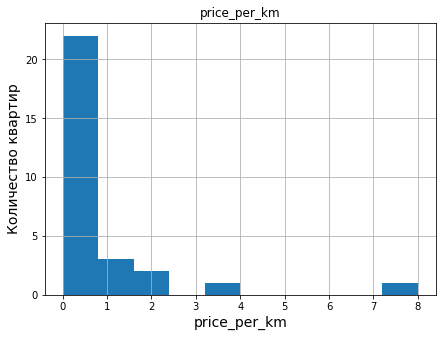

In [1351]:
#Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. 
 #   После этого посчитайте среднюю цену для каждого километра. 
  #  Постройте график: он должен показывать, как цена зависит от удалённости от центра. flats_in_spb.info()

flats_in_spb['price_per_km']=flats_in_spb['price_per_km'].astype(int, errors='ignore')
pivot_price=flats_in_spb.pivot_table(index='km_to_center', values='price_per_km', aggfunc='mean')
pivot_price.hist(range=(0,8),figsize=(7,5))
plt.xlabel('price_per_km',fontsize=14)
plt.ylabel('Количество квартир',fontsize=14)
plt.show()
#Построим график, который покажет, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

График сильно меняется на 3 км от центра города — пусть это и будет центральная зона.

<div style="border:solid  red  2px; padding: 20px"> <h1 style="color: red ; margin-bottom:20px">Комментарий наставника</h1>

Центр всё же в радиусе 3 км, неудачная визуализация для этого, сделай более наглядную



<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Хорошо

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. 

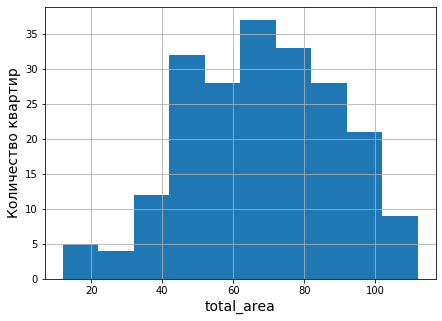

count    209.000000
mean      67.444976
std       21.224715
min       12.000000
25%       51.000000
50%       68.000000
75%       83.000000
max      112.000000
Name: total_area, dtype: float64


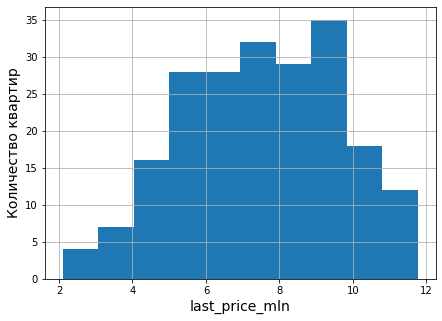

count    209.000000
mean       7.522540
std        2.134688
min        2.100000
25%        5.850000
50%        7.563000
75%        9.000000
max       11.768000
Name: last_price_mln, dtype: float64


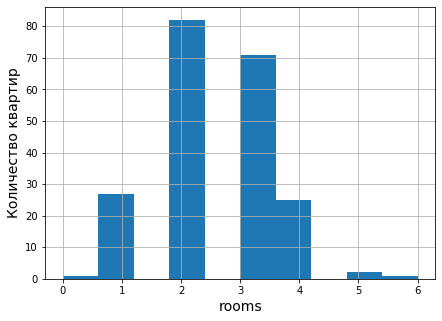

count    209.000000
mean       2.488038
std        0.946197
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: rooms, dtype: float64


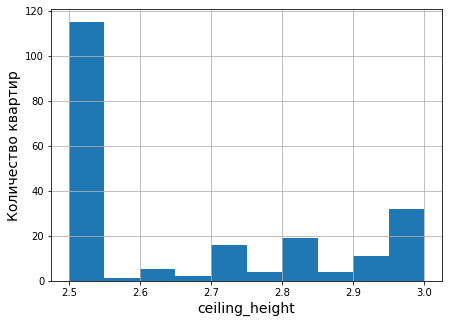

count    209.000000
mean       2.657895
std        0.196139
min        2.500000
25%        2.500000
50%        2.500000
75%        2.820000
max        3.000000
Name: ceiling_height, dtype: float64


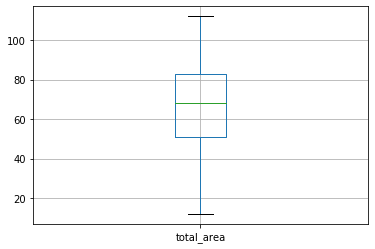

Верхний ус total_area 112
Нижний ус total_area 12


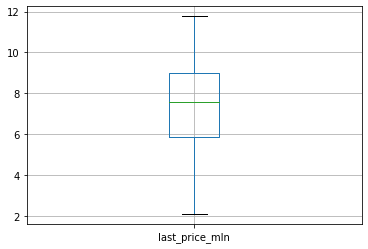

Верхний ус last_price_mln 11.768
Нижний ус last_price_mln 2.1


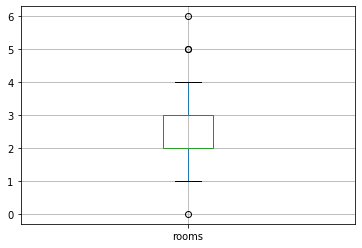

Верхний ус rooms 4
Нижний ус rooms 1


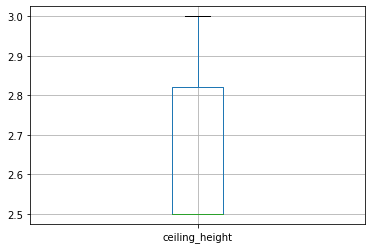

Верхний ус ceiling_height 3.0
Нижний ус ceiling_height 2.5


In [1352]:
flats_in_spb_center_filt=flats_in_spb.query('km_to_center<3')
#изучаю следующие параметры: площадь, цена, число комнат, высота потолков
parameters=['total_area','last_price_mln','rooms','ceiling_height']
for i in parameters:
    flats_in_spb_center_filt[i].hist(figsize=(7,5))  #строю гистограммы в цикле
    plt.xlabel(i,fontsize=14)
    plt.ylabel('Количество квартир',fontsize=14)
    plt.show()
    print(flats_in_spb_center_filt[i].describe())  #применяю метод describe() там же
 
for i in parameters: #строю диаграмму размаха, определяю в цикле значение верхнего и нижнего усов для каждого параметра
    flats_in_spb_center_filt.boxplot(column=[i])
    plt.show()
    median = np.median(flats_in_spb_center_filt[i])
    upper_quartile = np.percentile(flats_in_spb_center_filt[i], 75)
    lower_quartile = np.percentile(flats_in_spb_center_filt[i], 25)
    iqr = upper_quartile - lower_quartile
    upper_whisker = flats_in_spb_center_filt[flats_in_spb_center_filt[i]<=upper_quartile+1.5*iqr].max()
    upper_whisker_of_parameter=upper_whisker[i]
    print("Верхний ус", i, upper_whisker_of_parameter)
    lower_whisker = flats_in_spb_center_filt[flats_in_spb_center_filt[i]>=lower_quartile-1.5*iqr].min()
    lower_whisker_of_parameter=lower_whisker[i]
    print("Нижний ус", i, lower_whisker_of_parameter)

In [1353]:
flats_in_spb_center_filt["days_exposition"].mean() #средняя длительность продажи квартиры в центре спб

228.7846889952153

Проанализировав сегмент квартир в центре и изучив параметры площади, цены, числа комнат, высоты потолков, можно сделать следущие выводы:
средняя площадь квартир в центре 67 кв. м, почти равна медиане, средняя цена 7,53 млн. руб., почти равна медиане, в среднем 2,5 комнаты,медиана 2 комнаты, и средняя высота потолков 2,65 метров. 

In [1354]:
corr_spb_center=flats_in_spb_center_filt.corr() #выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 
print("Значения корреляции цены и факторов")
print( corr_spb_center['last_price'].sort_values()) # вывожу только столбец корреляции цены квартиры. 

Значения корреляции цены и факторов
open_plan                -0.171821
month                    -0.130094
kitchen_to_total_ratio   -0.126250
cityCenters_nearest      -0.114731
day_of_week              -0.106893
ponds_around3000         -0.089587
km_to_center             -0.089086
parks_nearest            -0.042148
is_apartment             -0.035010
ceiling_height           -0.014981
year                     -0.006393
days_exposition          -0.003800
floors_total             -0.003769
parks_around3000          0.002916
ponds_nearest             0.006759
living_to_total_ratio     0.025008
total_images              0.073742
balcony                   0.085102
price_per_metr            0.121847
airports_nearest          0.133436
floor                     0.181664
kitchen_area              0.212028
rooms                     0.612040
living_area               0.664706
price_per_km              0.674046
total_area                0.719067
last_price_mln            1.000000
last_price         

Стоимость квартир в центре Санкт-Петербурга зависит от общей площади (0,72), от количества комнат(0,61), почти не зависят от этажа (0,18), обратная зависимость от открытой планировки (-0,17), удаления от центра, но незначительная, от месяца размещения объявления. 

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Всё верно и точно сделано, как выводы, так и код написаны правильно


### Шаг 5. Общий вывод

До отсечения выбросов были получены следующие значения:
Среднее значение общей площади квартиры 60 кв.м, средняя стоимость квартиры 6,54 млн руб, среднее количество комнат 2,07, средняя высота потолка 2,66 метра.

После анализа отфильтрованных данных, значения снизились, так как мы фильтровали данные по максимальным значениям. 

Средняя площадь квартир составляет 51,6 кв.м, средняя цена 4,69 млн руб, среднее количество комнат в квартире 1,88, в среднем высота потолка равна 2,58 м.

В среднем квартиры продаются за 106 дней. А по первоначальным данным средняя длительность продажи квартиры составляла 160 дней.

На стоимость квартиры влияют следующие факторы: количество квадратных метров квартиры "0.68" (общая площадь, жилая площадь, площадь кухни), число комнат  "0.41", этаж в общем  "0.16", обратная зависимость от удалённости от центра  "-0.21". 
Зависимость от года размещения объявления "-0.04", коэффициент корреляции от дня и месяца размещения тоже стремится к 0, то есть зависимости нет. 

Несмотря на низкий коэффициент корреляции этажа в общем 0,16, Самая низкая средняя цена на квартиры на первом этаже, квартиры повыше на 40% дороже, на последнем этаже квартиры дороже на 53%, чем на 1 этаже.
 
Самое большое количество объявлений в следующих городах: Санкт-Петербург, посёлок Мурино, посёлок Шушары, Всеволожск, Пушкин, Колпино, посёлок Парголово, Гатчина, деревня Кудрово, Выборг.
               
 Максимальная цена квадратного метра в населенном пункте посeлок Лисий Нос составляет 123 136.30 рублей 
Минимальная цена квадратного метра в населенном пункте деревня Старополье составляет 11 238.37 рублей

График сильно меняется на 3 км от центра города Санкт-Петербург — пусть это и будет центральная зона.
Проанализировав сегмент квартир в центре СПБ и изучив параметры площади, цены, числа комнат, высоты потолков, можно сделать следущие выводы:
средняя площадь квартир в центре 67 кв. м, почти равна медиане, средняя цена 7,53 млн. руб., почти равна медиане, в среднем 2,5 комнаты,медиана 2 комнаты, и средняя высота потолков 2,65 метров. 
Стоимость квартир в центре Санкт-Петербурга зависит от общей площади (0,72), от количества комнат(0,61), почти не зависят от этажа (0,18), обратная зависимость от открытой планировки (-0,17), удаления от центра, но незначительная, от месяца размещения объявления.  
Если сравнивать выводы по всему городу и по центру СПБ, то средняя площадь квартиры в центре СПБ больше на 30%, средняя цена выше в центре СПБ на 60%, среднее количество комнат так же больше в центре СПБ, высота потолков в среднем выше на 7 см.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Классные, точные и обоснованные выводы, супер)

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод

<div style="border:solid  green  2px; padding: 20px">

<h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

#### Код

Всё отлично. Из того, что очень порадовало - соблюдена структура проекта, шаги из задания обозначены и выполнены последовательно, код написан аккуратно, используются комментарии к коду, быстро можно понять, какие операции выполняют сложные конструкции. В качестве совета предлагаю глубже изучить библиотеку Seaborn для построения более ярких и качественных визуализаций в Python, так как иногда хорошая красочная визуализация может сказать очень многое о данных.

#### Выводы

Ты пишешь отличные обоснованные выводы по проделанной раблоте и выдвигаешь корректные гипотезы - это очень радует!) Так же видно глубокое понимание проведённого анализа. Было очень интересно проверять твой проект и следить за твоей мыслью, продолжай в том же духе) Удачи!)